### Import Dependent Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load and Process the Data

In [ ]:
df = pd.read_csv('/content/House_for_rent_islamabad_pk.csv')
df.sample(5)

,Unnamed: 0,Location,Area,Bedrooms,Baths,Price
3001,3001,G-13,14.0,7.0,6.0,500000
2505,2505,Naval,20.0,6.0,6.0,160000
1569,1569,Soan,12.0,6.0,6.0,110000
1615,1615,DHA,20.0,5.0,5.0,250000
1973,1973,B-17,14.0,6.0,6.0,130000


In [ ]:
# drop unneccessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df['Location'].value_counts()

,count
Location,
F-7,440
DHA,412
F-8,374
Bahria,298
G-13,275
...,...
I-13,1
Gulshan-e-Khudadad,1
Taramrri,1


In [ ]:
# handle the categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])

In [ ]:
df.head()

,Location,Area,Bedrooms,Baths,Price
0,24,26.0,4.0,5.0,420000
1,11,11.0,3.0,4.0,100000
2,24,26.0,4.0,5.0,650000
3,22,20.0,6.0,6.0,450000
4,10,10.0,9.0,6.0,120000


In [ ]:
df.shape

(3899, 5)

In [ ]:
df.duplicated().sum()

1134

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(2765, 5)

In [ ]:
df.isnull().sum()

,0
Location,0
Area,0
Bedrooms,137
Baths,283
Price,0


In [ ]:
missing_percen = df.isnull().sum()/df.shape[0]*100
missing_percen

,0
Location,0.000000
Area,0.000000
Bedrooms,3.942134
Baths,8.788427
Price,0.000000


In [ ]:
df.describe()

,Location,Area,Bedrooms,Baths,Price
count,2765.000000,2765.000000,2656.000000,2522.000000,2.765000e+03
mean,23.245208,23.807523,5.174322,5.038462,5.209423e+05
std,15.087537,99.691223,1.830922,1.218538,6.757630e+05
min,0.000000,0.900000,1.000000,1.000000,0.000000e+00
25%,12.000000,8.000000,4.000000,4.000000,1.100000e+05
50%,23.000000,20.000000,5.000000,5.000000,2.549990e+05
75%,30.000000,26.000000,6.000000,6.000000,7.000000e+05
max,70.000000,4500.000000,11.000000,10.000000,8.000000e+06


In [ ]:
df['Bedrooms'] = df['Bedrooms'].fillna(df['Bedrooms'].median())
df['Baths'] = df['Baths'].fillna(df['Baths'].mean())

In [ ]:
df.isnull().sum()

,0
Location,0
Area,0
Bedrooms,0
Baths,0
Price,0


In [ ]:
df.head()

,Location,Area,Bedrooms,Baths,Price
0,24,26.0,4.0,5.0,420000
1,11,11.0,3.0,4.0,100000
2,24,26.0,4.0,5.0,650000
3,22,20.0,6.0,6.0,450000
4,10,10.0,9.0,6.0,120000


In [ ]:
X = df.drop(columns=['Price'])
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2212, 4), (553, 4), (2212,), (553,))

In [ ]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[0]

array([ 0.12465898, -0.30389993, -0.64719937, -0.86750968])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

In [ ]:
y_train

array([[0.009375],
       [0.01225 ],
       [0.011875],
       ...,
       [0.0475  ],
       [0.015   ],
       [0.0275  ]])

### Define The Neural Network

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Normalization,Input

In [ ]:
model = Sequential()
model.add(Input(shape=(4,)))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='linear'))

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

### Train the Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.0001,
    patience = 5,
    restore_best_weights = True
)

In [ ]:
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=32,callbacks=[early_stopping])

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mae: 0.0247 - val_loss: 0.0015 - val_mae: 0.0212
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mae: 0.0246 - val_loss: 0.0016 - val_mae: 0.0221
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0022 - mae: 0.0255 - val_loss: 0.0018 - val_mae: 0.0253
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mae: 0.0254 - val_loss: 0.0015 - val_mae: 0.0210
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mae: 0.0245 - val_loss: 0.0016 - val_mae: 0.0223
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - mae: 0.0240 - val_loss: 0.0016 - val_mae: 0.0218


In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

# Show a few predictions
print(f"Actual Prices: {y_test[:5]}")
print(f"Predicted Prices: {y_pred[:5].flatten()}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Actual Prices: [[0.02625 ]
 [0.03125 ]
 [0.0125  ]
 [0.225   ]
 [0.013125]]
Predicted Prices: [0.02165158 0.04164261 0.02018229 0.17232162 0.0166233 ]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict using the model
y_pred = model.predict(X_test)

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) score: {r2}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Absolute Error (MAE): 0.02115692980687873
Mean Squared Error (MSE): 0.0015123664469848315
Root Mean Squared Error (RMSE): 0.03888915590476131
R-squared (R²) score: 0.7213771066464123


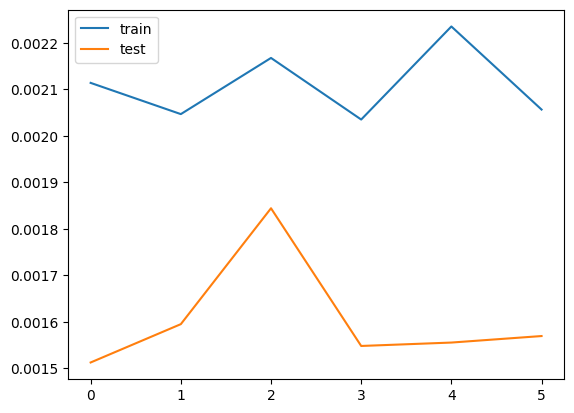

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

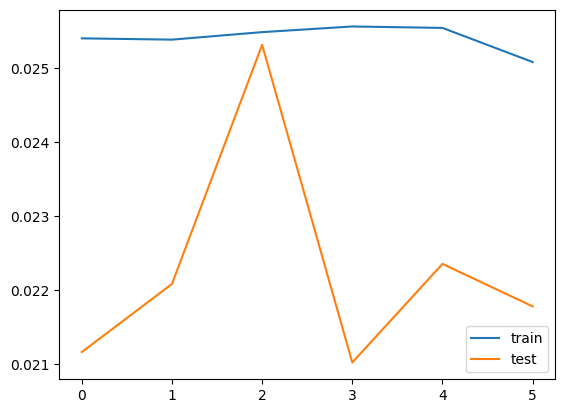

In [ ]:
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.legend()
plt.show()

For tomorrow